# Example: Single Asset Geometric Brownian Motion (GBM) Models
[Geometric Brownian motion (GBM)](https://en.wikipedia.org/wiki/Geometric_Brownian_motion) is a continuous-time stochastic process model in which the random variable $S(t)$, e.g., the share price of a firm with ticker symbol `XYZ` is described by a deterministic drift corrupted by a [Wiener process](https://en.wikipedia.org/wiki/Wiener_process):

$$
\begin{equation}
\frac{dS}{S} = {\mu}\,dt + \sigma\,{dW}
\end{equation}
$$

The constant $\mu$ denotes a drift parameter, i.e., the growth rate, $\sigma$ is a volatility parameter, and $dW$ represents the output of a [Wiener process](https://en.wikipedia.org/wiki/Wiener_process).  Using [Ito's lemma](https://en.wikipedia.org/wiki/Itô%27s_lemma), we can formulate an analytical solution to the GBM equation for a single asset:

$$S(t) = S_{\circ}\exp\Biggl[\left(\mu-\frac{\sigma^{2}}{2}\right)\left(t - t_{\circ}\right) + (\sigma\sqrt{t-t_{\circ}})\cdot{Z_{t}(0,1)}\Biggr]$$

where $S_{\circ}$ denotes the share price at $t_{\circ}$, and $Z_{t}(0,1)$ denotes a [standard normal random variable](https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution) at time $t$.

## Learning objectives
This example will help students learn to construct and use single-asset geometric Brownian motion (GBM) models. Specifically, we will use historical data to estimate the drift parameters $\mu$ and $\sigma$  in the GBM analytical solution. We'll compare the model's share price predictions for different periods to actual market values (in-sample).

* __Prerequisite__ (duration 5 min): Break up into teams and familiarize yourself with the lab, its setup, packages, types, functions, etc. Execute the `include("Include.jl")` command and load the data. Report any questions that your group has to the class.
* __Objective 1__: Estimate the $\mu$-parameter for each firm in the dataset.
    * `Check`: Is the actual residual `Normally` distributed?
* __Objective 2__: Estimate the $\sigma$-parameter for each firm in the dataset. 
* __Objective 3__: Pick a firm and a random period, simulate the share price, and compare the simulation with the observed price.
    * `TODO` Build an instance of the `MyGeometricBrownianMotionEquityModel` model, inspect the fields, and ensure you understand them. 
    * `TODO` Sample the `MyGeometricBrownianMotionEquityModel` using the `sample(...)` function, and compute the `expectation` and `variance` using the analytical GBM expressions.

## Setup
We set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, various functions we will use in the exercise, and custom types to model the components of our example problem.

In [1]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-2/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-2/Manifest.toml`
  Activating project at `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-2`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-2/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-2/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-2/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CH

### Packages
The `Include.jl` file loads several packages that we use'll for our exercises:
* [Dates.jl](https://docs.julialang.org/en/v1/stdlib/Dates/#Dates)  is a package included with the standard library which provides basic functionality for working dates.
* [DataFrames.jl](https://dataframes.juliadata.org/stable/) and [CSV.jl](https://github.com/JuliaData/CSV.jl) provide a set of tools for working with tabular data in [Julia](https://julialang.org). Its design and functionality are similar to those of [Pandas (in Python)](https://pandas.pydata.org) and [data.frame, data.table and dplyr (in R)](https://dplyr.tidyverse.org), making it an excellent general-purpose data science tool.
* [Distributions.jl](https://github.com/JuliaStats/Distributions.jl) is a [Julia](https://julialang.org) package for probability distributions and associated functions.
* [PrettyTables.jl](https://ronisbr.github.io/PrettyTables.jl/stable/man/html_backend/) is a [Julia](https://julialang.org) package that implements functions to construct and display text-based tables
* [Plots.jl](https://docs.juliaplots.org/stable/) is a plotting library, and [Colors.jl](https://github.com/JuliaGraphics/Colors.jl) is a color library that we'll use for data visualization in [Julia](https://julialang.org).
* [LinearAlgebra.jl](https://github.com/JuliaLang/LinearAlgebra.jl) is a package that provides functionality for working with linear algebra in [Julia](https://julialang.org).
* [Statistics.jl](https://docs.julialang.org/en/v1/stdlib/Statistics/#Statistics) is a package included with the standard library module, which contains basic statistics functionality

### Types
`Include.jl` loads some [problem-specific types](https://docs.julialang.org/en/v1/manual/types/#Composite-Types) that will be helpful for the geometric Brownian motion simulation of equity share prices.

The mutable struct `MyGeometricBrownianMotionEquityModel`, which holds the parameters associated with the geometric Brownian motion simulation, has two fields:
* The `μ::Float64` field holds the drift or growth parameter for the model
* The `σ::Float64` field holds the volatility parameter for the model

### Functions
The `Include.jl` file also loads the following [Julia functions](https://docs.julialang.org/en/v1/manual/functions/):

`function loaddatafile(; firm::Int = 1, year::String = "Year-1") -> DataFrame` 
 > The `loaddatafile(...)` function, which load historical share price data, takes an [Int](https://docs.julialang.org/en/v1/manual/integers-and-floating-point-numbers/#Integers) that encodes a `firm index` and a [String](https://docs.julialang.org/en/v1/manual/strings/) argument that holds the `year` parameter of the dataset. The historical share price data is returned to the caller as a [DataFrame](https://dataframes.juliadata.org/stable/) with the fields: `volume`,`volume_weighted_average_price`,`open`,`close`,`high`, and `low,number_of_transactions`.

`function generate_firm_index_set() -> Set{Int64}`
> The `generate_firm_index_set()` function generates the set of `firm_id` values for which we have data files for all the years of this study, i.e., `Year-1,..., Year-5`. 

`function build(model::Type{MyGeometricBrownianMotionEquityModel}, data::NamedTuple) -> MyGeometricBrownianMotionEquityModel` 
> The `build)(...)` function takes information in the `data` [NamedTuple](https://docs.julialang.org/en/v1/base/base/#Core.NamedTuple) argument (the $(\mu, \sigma)$ values) and returns an instance of the `MyGeometricBrownianMotionEquityModel` [mutable type](https://docs.julialang.org/en/v1/manual/types/#Mutable-Composite-Types). 

`function sample(model::MyGeometricBrownianMotionEquityModel, data::NamedTuple; number_of_paths::Int64 = 100) -> Array{Float64,2}`
> The `sample(...)` function takes a `MyGeometricBrownianMotionEquityModel` instance, and information in the `data` [NamedTuple](https://docs.julialang.org/en/v1/base/base/#Core.NamedTuple) argument and solves the geometric Brownian motion model for `number_of_paths` (default: 100) trials. The `data` argument holds the initial share price `Sₒ::Float64`, the initial and final times for the simulation `T₁` and `T₂` respectively (both are `Float64` types), and the simulation time step `Δt::Float64`.

`function 𝔼(model::MyGeometricBrownianMotionEquityModel, data::NamedTuple) -> Array{Float64,2}`
> The `𝔼(...)` functions takes a `MyGeometricBrownianMotionEquityModel` instance and information in the `data` [NamedTuple](https://docs.julialang.org/en/v1/base/base/#Core.NamedTuple) argument and computes the expectation of the share price as a function of time. The expectation is returned as a `T`$\times$`2` array where the first column holds the time values while the second column holds the expected share price. The `data` argument holds the initial share price `Sₒ::Float64`, the initial and final times for the simulation `T₁` and `T₂` respectively (both are `Float64` types), and the simulation time step `Δt::Float64`.

`function Var(model::MyGeometricBrownianMotionEquityModel, data::NamedTuple) -> Array{Float64,2}`
> The `Var(...)` function takes a `MyGeometricBrownianMotionEquityModel` instance and information in the `data` [NamedTuple](https://docs.julialang.org/en/v1/base/base/#Core.NamedTuple) argument and computes the variance of the share price as a function of time. The variance is returned as a `T`$\times$`2` array where the first column holds the time values while the second column holds the share price variance. The `data` argument holds the initial share price `Sₒ::Float64`, the initial and final times for the simulation `T₁` and `T₂` respectively (both are `Float64` types), and the simulation time step `Δt::Float64`.

## Prerequisites: Load and clean the historical dataset
We gathered a daily open-high-low-close `dataset` for each firm in the [S&P500](https://en.wikipedia.org/wiki/S%26P_500) from `01-03-2018` until `12-29-2023`, along with data for a few exchange-traded funds and volatility products during that time. We load the `orignal_dataset` by calling the `MyMarketDataSet()` function:

In [2]:
original_dataset = MyMarketDataSet() |> x-> x["dataset"];

### Clean the data
Not all tickers in our dataset have the maximum number of trading days for various reasons, e.g., acquisition or de-listing events. Let's collect only those tickers with the maximum number of trading days.

* First, let's compute the number of records for a company that we know has a maximum value, e.g., `AAPL`, and save that value in the `maximum_number_trading_days` variable:

In [3]:
maximum_number_trading_days = original_dataset["AAPL"] |> nrow;

Now, let's iterate through our data and collect only tickers with `maximum_number_trading_days` records. Save that data in the `dataset::Dict{String,DataFrame}` variable:

In [4]:
dataset = Dict{String,DataFrame}();
for (ticker,data) ∈ original_dataset
    if (nrow(data) == maximum_number_trading_days)
        dataset[ticker] = data;
    end
end
dataset;

Then, get a list of firms that we have in the cleaned-up `dataset` and save it in the `list_of_all_firms` array (we sort these alphabetically):

In [5]:
list_of_all_firms = keys(dataset) |> collect |> sort;

Finally, we set some constant values that are used throughout the study. In particular, the value of $\Delta{t}$ holds the time step that we'll use (see below for a discussion of the value), and we'll specify the number of trading days to simulate in the `T` variable:

In [6]:
Δt = (1.0/252.0);
T = 48;
all_range = range(1,stop=maximum_number_trading_days,step=1) |> collect;

## Objective 1: Estimate the $\mu$ parameter from data
Let $\mathbf{A}$ denote a $\mathcal{S}\times{2}$ matrix, where each row corresponds to a time value. The first column of $\mathbf{A}$ is all 1's while the second column holds the $(t_{k}-t_{\circ})$ values. Further, let $\mathbf{Y}$ denote the `ln` of the price values of `firm_id` (in the same order as the $\mathbf{A}$ matrix). Then, the y-intercept and slope (drift parameter) can be estimated by solving the `overdetermined` system of equations:

$$\mathbf{A}\mathbf{\theta} + \mathbf{\epsilon} = \mathbf{Y}$$

where $\mathbf{\theta}$ denotes the vector of unknown parameters. This system can be solved as:

$$\mathbf{\theta} = (\mathbf{A}^{T}\mathbf{A})^{-1}\mathbf{A}^{T}\mathbf{Y} - (\mathbf{A}^{T}\mathbf{A})^{-1}\mathbf{A}^{T}\mathbf{\epsilon}$$

where $\mathbf{A}^{T}$ denotes the transpose of the matrix $\mathbf{A}$, and $(\mathbf{A}^{T}\mathbf{A})^{-1}$ denotes the inverse of the square matrix product $\mathbf{A}^{T}\mathbf{A}$. Finally, we can estimate the error term $\mathbf{\epsilon}$ by calculating the residuals:

$$\mathbf{\epsilon} = \mathbf{Y} - \mathbf{A}\mathbf{\theta}$$

and fitting a normal distribution to the residuals to compute the uncertainty in the estimate of the mean of the drift parameter $\hat{\mu}$. Initially, let's neglect modeling the residuals $\mathbf{\epsilon}$ and consider only the mean solution:

In [7]:
μ̂_dictionary = Dict{String,Float64}();
for i ∈ eachindex(list_of_all_firms)
    
    firm_ticker = list_of_all_firms[i];
    firm_data = dataset[firm_ticker];
    T_all = all_range*Δt .- Δt;
    
    A = [ones(maximum_number_trading_days) T_all];
    Y = log.(firm_data[!,:volume_weighted_average_price]);

    # Solve the normal equations -
    θ = inv(transpose(A)*A)*transpose(A)*Y;

    # get estimated μ -
    μ̂_dictionary[firm_ticker] = θ[2];
end
μ̂_dictionary;

### Check: Is the actual residual `Normally` distributed?
We assumed that the error model `ϵₙ`, which describes the portion of the data not captured by the deterministic share price expression, was `normally` distributed. Let's plot the actual density `ϵ` of the residuals versus and the `normal` error model to see how well they match:

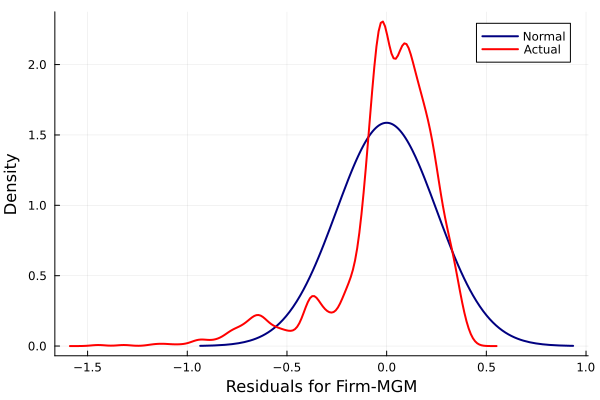

In [8]:
rand_firm_ticker = rand(list_of_all_firms)
firm_data = dataset[rand_firm_ticker]
T_all = all_range*Δt .- Δt;
A = [ones(maximum_number_trading_days) T_all];
Y = log.(firm_data[!,:volume_weighted_average_price]);
θ = inv(transpose(A)*A)*transpose(A)*Y;

ϵ = Y .- A*θ
ϵₙ = fit_mle(Normal,ϵ);

plot(ϵₙ, label="Normal", c=:navyblue,lw=2)
density!(ϵ, normalize=true, xlabel="Residuals for Firm-$(rand_firm_ticker)", 
    ylabel="Density", label="Actual", c=:red,lw=2)

The residual plots may look similar or different, depending on the random `ticker` that was selected.
One approach to answering this question more rigorously is to perform a one-sample [Anderson–Darling test](https://en.wikipedia.org/wiki/Anderson–Darling_test), exported by the [HypthesisTests.jl package](https://juliastats.org/HypothesisTests.jl/stable/), of the `H0: null hypothesis` that the actual residual `ϵ` is drawn from the distribution `ϵₙ` against the `H1:alternative hypothesis` that the sample is not drawn from distribution `ϵ`.

* If we `reject` the `H0: null hypothesis,` i.e., the `actual` residual `ϵ`  and `ϵₙ` are from different distributions, we might consider using a different error model in future applications for this `ticker.` Let's reject if the `pvalue`$\leq$`0.05`.

In [9]:
AD_test_result = OneSampleADTest(ϵ,ϵₙ) |> pvalue
if (AD_test_result ≤ 0.05)
    println("Reject H0: The actual residual is NOT normally distributed. Hmmm. pvalue=$(AD_test_result)")
else
    println("The actual residual is normally distributed.")
end

Reject H0: The actual residual is NOT normally distributed. Hmmm. pvalue=3.9787798400414687e-7


### Check: How well does the deterministic model fit the data?
Before we estimate the volatility parameter $\sigma$, let's look at how well the share price is replicated by the estimated expected value of $\mu$ and how uncertainty in $\mu$ influences the simulation.
* First, compute the estimated price vector $\hat{\mathbf{Y}} = \mathbf{A}\cdot\mathbf{\theta}$ using the expected value of $\mu$, and plot this on the same axis as the actual price data vector $\mathbf{Y}$:

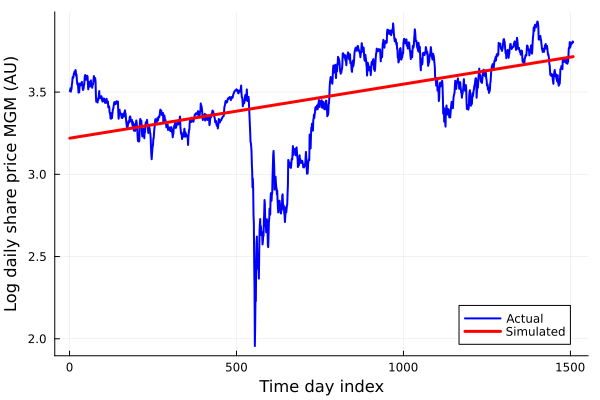

In [10]:
Ŷ = A*θ; # actual
plot(Y,c=:blue,lw=2, label="Actual")
plot!(Ŷ,c=:red,lw=3, label="Simulated")
xlabel!("Time day index", fontsize=18);
ylabel!("Log daily share price $(rand_firm_ticker) (AU)", fontsize=18)

Next, let's sample the predicted log share price $\hat{\mathbf{Y}}$ where we consider the error model $\epsilon_{n}$.

In [11]:
N = 1000;
error_simulation_array = Array{Float64,2}(undef,maximum_number_trading_days,N);
for i ∈ 1:N
    error = rand(ϵₙ,maximum_number_trading_days)
    θᵢ = inv(transpose(A)*A)*transpose(A)*Y + inv(transpose(A)*A)*transpose(A)*error
    Ŷᵢ = A*θᵢ
    for k ∈ 1:maximum_number_trading_days
        error_simulation_array[k,i] =  Ŷᵢ[k]
    end
end

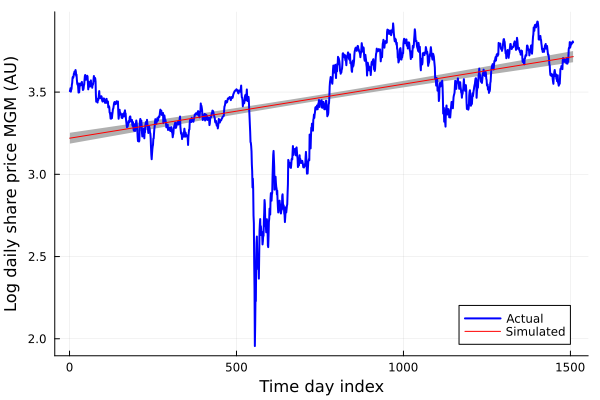

In [12]:
mean_value = mean(error_simulation_array,dims=2);
std_value = std(error_simulation_array,dims=2);
plot(mean_value,fillrange=(mean_value .+ 2.576*std_value), label="", c=:gray69)
plot!(mean_value,fillrange=(mean_value .- 2.576*std_value), label="", c=:gray69)
plot!(Y,c=:blue,lw=2, label="Actual")
plot!(Ŷ,c=:red,lw=1, label="Simulated")
xlabel!("Time day index", fontsize=18);
ylabel!("Log daily share price $(rand_firm_ticker) (AU)", fontsize=18)

## Objective 2: Estimate the volatility parameter $\sigma$ from data
There are multiple methods to calculate the volatility parameter $\sigma$. Generally, these approaches can be classified into two categories - historical volatility estimates based on past return data and future volatility estimates based on the [Implied Volatility (IV)](https://en.wikipedia.org/wiki/Implied_volatility) of [put and call options contracts](https://en.wikipedia.org/wiki/Option_(finance)). Here, we estimate the volatility $\sigma$ from historical data.

We process each firm in the `dataset` using a `for` loop. First, we define the `σ̂_dictionary = Dict{String, Float64}()`, which will hold estimates of the volatility parameter for each firm (as `key`$\rightarrow$`value` pairs, where `key` is the `ticker` and the `value` is the volatility). Then, for each iteration of the loop, i.e., for each firm, we:

* Select a `firm_ticker` and `firm_data`, and compute the `growth_rate_array` for the firm. 
* We define an array that holds the values for $\mu_{j,j-1}$, named `growth_rate_array`. We then populate the `growth_rate_array` using a `for` loop; during each pass through the loop, we get values for $S_{j-1}$ and $S_{j}$, i.e., the VWAP for the two days from the dataset `firm_data,` and then compute (and store) the annualized value of $\mu_{j,j-1}$ parameter in the `growth_rate_array.`
* Finally, we approximate the historical volatility $\sigma$ from the variance of the returns computed from the historical data set.
    * We fit the return data to a `Normal` distribution using [maximum likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) and then computed an estimate of the __annualized historical volatility__ as $\sqrt{252}\cdot\hat{\sigma}$. We access the variance using the `params(...)` function from the [Distributions.jl](https://github.com/JuliaStats/Distributions.jl.git) package.

In [13]:
σ̂_dictionary = Dict{String,Float64}();
for i ∈ eachindex(list_of_all_firms)
    
    firm_ticker = list_of_all_firms[i];
    firm_data = dataset[firm_ticker];

    growth_rate_array = Array{Float64,1}(undef, maximum_number_trading_days-1)
    for j ∈ 2:maximum_number_trading_days
        S₁ = firm_data[j-1, :volume_weighted_average_price];
        S₂ = firm_data[j, :volume_weighted_average_price];
        growth_rate_array[j-1] = (1/Δt)*log(S₂/S₁);
    end
    
    R = growth_rate_array.*Δt; # hmmm: what is going on here?
    nd = fit_mle(Normal, R);
    σ̂_dictionary[firm_ticker] = params(nd) |> last |> x-> *(x, sqrt(252));
end
σ̂_dictionary;

### Aside: Let's save the estimated drift and volatility parameters

In [14]:
parameters_df = DataFrame();
for i ∈ eachindex(list_of_all_firms)
    
    firm_ticker = list_of_all_firms[i];
    μ̂ = μ̂_dictionary[firm_ticker]
    σ̂ = σ̂_dictionary[firm_ticker]
    
    data_tuple = ( 
        ticker = firm_ticker,
        drift =  μ̂,
        volatility = σ̂
    );
    
    push!(parameters_df, data_tuple)
end
findfirst(x->x=="SPY",parameters_df[:,:ticker]) |> i-> parameters_df[i,:]

Row,ticker,drift,volatility
,String,Float64,Float64
377,SPY,0.100555,0.158792


In [15]:
CSV.write(joinpath(_PATH_TO_DATA,"Parameters-SP500-2018-2023.csv"), parameters_df);

## Objective 3: Visualize the simulation of a random firm for a random period
Let's begin by selecting a `random_firm_index` from our list of firms, and get its associated data, store this in the `random_firm_data` variable:

In [16]:
random_firm_ticker = rand(list_of_all_firms)
random_firm_data = dataset[random_firm_ticker];
println("The (randomly) selected firm in this study: $(random_firm_ticker)")

The (randomly) selected firm in this study: PKG


Next, let's randomly choose a contiguous time window of `T` days (also specified above) and analyze the model’s performance during this period. To begin, we will generate the `start_index` variable, i.e., the trading index to start the simulation from. The `stop_index` will then be determined by adding the number of trading days `T` to the `start_index`:

In [17]:
start_index = rand(1:(maximum_number_trading_days - T - 1))
stop_index = start_index + T
println("Visualize Firm-$(random_firm_ticker) between trading days ($(start_index) -> $(stop_index))")

Visualize Firm-PKG between trading days (341 -> 389)


Get the $(\hat{\mu},\hat{\sigma})$ values from the respective dictionaries for the `random_firm_index`:

In [18]:
μ̂ = μ̂_dictionary[random_firm_ticker];
σ̂ = σ̂_dictionary[random_firm_ticker];
println("Firm-$(random_firm_ticker) has (μ̂,σ̂) = ($(μ̂),$(σ̂))")

Firm-PKG has (μ̂,σ̂) = (0.07264321798356613,0.26705119969456265)


Finally, let's create a geometric Brownian motion model, using the `build(…)` function and then solve it between `T₁` and `T₂` starting with price `Sₒ` using the `solve(…)` function. 
* In addition to the analytical values of the expectation and the variance, our simulation generates `N = 100` sample paths using the `sample(...)` function, where the resulting price values are saved in the `X` array. This array will be a `T`$\times$`N+1` array,  each row corresponds to a time value, while each column (after the first) is a solution:

In [19]:
model = build(MyGeometricBrownianMotionEquityModel, (
            μ = μ̂, σ = σ̂ ));

Sₒ = random_firm_data[start_index,:volume_weighted_average_price];
T₁ = start_index*Δt
T₂ = stop_index*Δt
X = VLQuantitativeFinancePackage.sample(model, (Sₒ = Sₒ, T₁ = T₁, T₂ = T₂, Δt = Δt), 
    number_of_paths = 100);

For Geometric Brownian Motion (GBM) analytical expressions are available for both the expected value and the variance of the share price. The expected share price is given by:

$$\mathbb{E}\left(S_{t}\right) = S_{o}\exp\left(\mu\cdot\Delta{t}\right)$$

where $\Delta{t} = t-t_{o}$ and $S_{o}$ denotes the share price at $t=t_{o}$. On the other hand the variance of the share price $\text{Var}(S_{t})$ at time $t$ is given by:

$$\text{Var}\left(S_{t}\right) = S_{\circ}^{2}e^{2\mu\cdot\Delta{t}}\left[e^{\sigma^{2}{\Delta{t}}} - 1\right]$$

We've implmented the analytical expectation and variance calculations in the `𝔼(...)` and `Var(...)` functions:

In [20]:
expectation = 𝔼(model, (Sₒ = Sₒ, T₁ = T₁, T₂ = T₂, Δt = Δt));
variance = Var(model, (Sₒ = Sₒ, T₁ = T₁, T₂ = T₂, Δt = Δt));

`Unhide` the block below to see how to plot the expected value and the variance of the simulated share price versus the actual shore price:

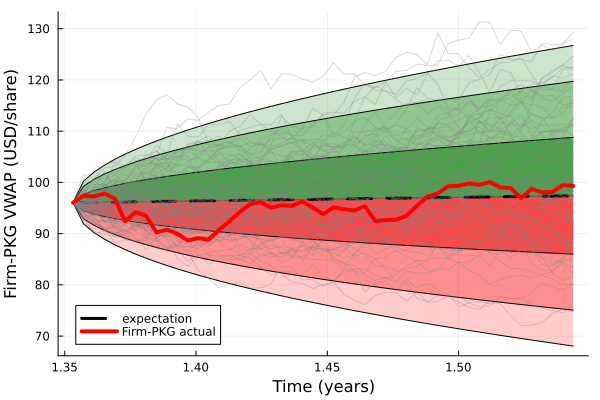

In [21]:
let
    L68 = expectation[:,2] .- sqrt.(variance[:,2])
    U68 = expectation[:,2] .+ sqrt.(variance[:,2])
    L95 = expectation[:,2] .- 1.96*sqrt.(variance[:,2])
    U95 = expectation[:,2] .+ 1.96*sqrt.(variance[:,2])
    L99 = expectation[:,2] .- 2.576*sqrt.(variance[:,2])
    U99 = expectation[:,2] .+ 2.576*sqrt.(variance[:,2])


    plot(expectation[:,1], expectation[:,2], fillrange=L68, c=:red, alpha=0.5, label="")
    plot!(expectation[:,1], expectation[:,2], fillrange=U68, c=:green, alpha=0.5, label="")
    plot!(expectation[:,1], expectation[:,2], fillrange=L95, c=:red, alpha=0.3, label="")
    plot!(expectation[:,1], expectation[:,2], fillrange=U95, c=:green, alpha=0.3, label="")
    plot!(expectation[:,1], expectation[:,2], fillrange=L99, c=:red, alpha=0.2, label="")
    plot!(expectation[:,1], expectation[:,2], fillrange=U99, c=:green, alpha=0.2, label="")

    plot!(expectation[:,1], expectation[:,2],c=:black, lw=3,ls=:dash, label="expectation")
    plot!(expectation[:,1], L68, c=:black, lw=1, label="")
    plot!(expectation[:,1], U68, c=:black, lw=1, label="")
    plot!(expectation[:,1], L95, c=:black, lw=1, label="")
    plot!(expectation[:,1], U95, c=:black, lw=1, label="")
    plot!(expectation[:,1], L99, c=:black, lw=1, label="")
    plot!(expectation[:,1], U99, c=:black, lw=1, label="")
    plot!(X[:,1],X[:,2:end], label="", c=:gray, alpha=0.3)
    plot!(X[:,1], random_firm_data[start_index:stop_index, :volume_weighted_average_price], lw=4, c=:red, 
        label="Firm-$(random_firm_ticker) actual")

    xlabel!("Time (years)", fontsize=18)
    ylabel!("Firm-$(random_firm_ticker) VWAP (USD/share)", fontsize=18)
end

### Was this a successful simulation?
Determining if a model accurately represents data can be done in various ways, but we will utilize a straightforward functional test. This test involves checking if the simulated price falls within a specified lower bound ($L_{j}$) and upper bound ($U_{j}$) for all times $t_j$ within a given interval ($t_{j}\in\mathcal{I}_{k}$). 

* If the simulation meets this requirement, it is deemed a `success`. The values for $L_{j}$ and $U_{j}$ can be customized, but we set these to $\mu\pm{2.576}\cdot{\sigma}$, where $\mu$ represents the expected value and $\sigma$ is the standard deviation of the geometric Brownian motion simulation. 
* However, if the actual price exceeds the given bounds at any point, the simulation is considered a `failure`.

In [22]:
L = expectation[:,2] .- 2.576*sqrt.(variance[:,2])
U = expectation[:,2] .+ 2.576*sqrt.(variance[:,2])
   
# check the bounds: if below L, or above U then simulation failed
success_flag = true;
for k ∈ 1:T
    if (random_firm_data[start_index+k-1,:volume_weighted_average_price] < L[k]) || (random_firm_data[start_index+k-1,:volume_weighted_average_price] > U[k])
        success_flag = false;
        break;
    end
end

println("The simulation of the VWAP of Firm-$(random_firm_ticker) between ($(start_index) -> $(stop_index)) was successful: $(success_flag)")

The simulation of the VWAP of Firm-PKG between (341 -> 389) was successful: true


In [23]:
# μ̂_factor = 2.0 # FILL ME IN
# σ̂_factor = 2.0 # FILL ME IN
# μ̂_2 = μ̂ * μ̂_factor
# σ̂_2 = σ̂ * σ̂_factor
# println("New values of (μ̂,σ̂) = ($(μ̂_2),$(σ̂_2))")

# model_2 = build(MyGeometricBrownianMotionEquityModel, (
#             μ = μ̂_2, σ = σ̂_2 ));

# Sₒ = random_firm_data[start_index,:volume_weighted_average_price];
# T₁ = start_index*Δt
# T₂ = stop_index*Δt
# X_2 = sample(model_2, (Sₒ = Sₒ, T₁ = T₁, T₂ = T₂, Δt = Δt), 
#     number_of_paths = 100);

# plot(X_2[:,1],X_2[:,2:end], label="", c=colors[2], alpha=0.3)
# plot!(X_2[:,1], random_firm_data[start_index:stop_index, :volume_weighted_average_price], lw=4, c=:red, 
#     label="Firm-$(random_firm_index) actual")

# xlabel!("Time (years)", fontsize=18)
# ylabel!("Firm-$(random_firm_index) VWAP (USD/share)", fontsize=18)

## Disclaimer and Risks
__This content is offered solely for training and informational purposes__. No offer or solicitation to buy or sell securities or derivative products or any investment or trading advice or strategy is made, given, or endorsed by the teaching team. 

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance.  Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on evaluating your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.